<a href="https://colab.research.google.com/github/carecu/La-Alquimia/blob/main/alquimia_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
import requests as r 
import pandas as pd
import plotly as ply 
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo

In [ ]:
#https://api.binance.com
# "https://api.coingecko.com/api/v3/"
baseurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1m"
endpoint = "coins/bitcoin/ohlc?vs_currency=usd&days=14"

geturl = baseurl
resp = r.get(url = geturl)

In [ ]:
resp.text

'[[1663679760000,"19019.54000000","19048.17000000","18962.44000000","18997.94000000","721.04902000",1663679819999,"13703632.84427820",14508,"326.94149000","6213646.46779980","0"],[1663679820000,"18999.10000000","19002.82000000","18960.27000000","18996.08000000","509.32203000",1663679879999,"9668760.07803840",8246,"243.31323000","4618681.69343710","0"],[1663679880000,"18994.28000000","18996.08000000","18956.70000000","18966.28000000","390.34881000",1663679939999,"7405507.73260710",7373,"185.77035000","3523962.10276860","0"],[1663679940000,"18967.19000000","18971.57000000","18904.80000000","18932.42000000","616.28675000",1663679999999,"11668470.51322170",11329,"310.54080000","5879693.75034850","0"],[1663680000000,"18931.27000000","18967.81000000","18931.27000000","18955.43000000","355.32817000",1663680059999,"6733641.40554340",8525,"180.62193000","3422882.11694820","0"],[1663680060000,"18955.43000000","18974.18000000","18939.78000000","18954.31000000","267.96087000",1663680119999,"508010

In [ ]:

velas = pd.DataFrame( eval(resp.text) , columns = ['dateTime','open','high','low','close','','','','','','',''])
velas['dateTime'] = pd.to_datetime(velas['dateTime'], unit = 'ms')
df = velas
fig = go.Figure(data = [go.Candlestick(
    x=df['dateTime'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='Gráfico V las')]

)

In [ ]:
df.set_index('dateTime')
df.closeTime = pd.to_datetime(df.dateTime, unit='ms')
df.close = pd.to_numeric(df.close)

df['lema'] = df.close.ewm(span=14).mean()
df['sema'] = df.close.ewm(span=7).mean()
df.lema = pd.to_numeric(df.lema)
df.sema = pd.to_numeric(df.sema)
	#RSI
rsi_period = 14
chg = df['close'].diff(1)
gain = chg.mask(chg<0,0)
df['gain'] = gain
loss = chg.mask(chg>0,0)
df['loss'] = loss
avg_gain = gain.ewm(com = rsi_period-1,min_periods=rsi_period).mean()
avg_loss = loss.ewm(com = rsi_period-1,min_periods=rsi_period).mean()
df['avg_gain'] = avg_gain
df['avg_loss'] = avg_loss
rsi = abs(avg_gain/avg_loss)
rsi = -((1/(1+rsi))-0.5)
rsi_peaks = 1/ (1 + rsi)
rsi= rsi.rolling(2).mean()
df['rsi'] = pd.to_numeric( rsi)

dfpeaks = df.rsi.mask( df.rsi<0.05)

dfpeaksb = df.rsi.mask( df.rsi>-0.05)

peaks, _ = find_peaks(dfpeaks)

bypeaks, _ = find_peaks(-dfpeaksb)

In [ ]:
tail= 30

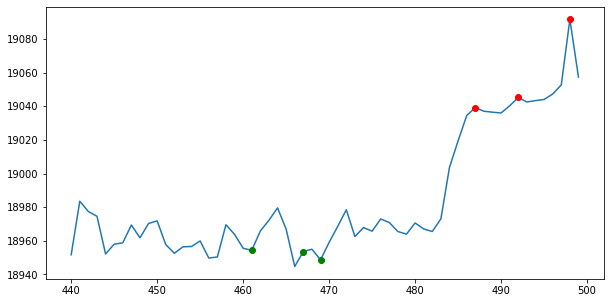

In [ ]:
tail =60

peaks = peaks[-3:]
bypeaks = bypeaks[-3:]
fig, ax = plt.subplots(1, figsize= (10, 5))
ax.plot(df.close.tail(tail))
ax.plot(df.close[peaks],'o', color = 'r')
ax.plot(df.close[bypeaks],'o', color = 'g')

417

In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [ ]:
df.rsi[peaks]

20   -0.301351
25   -0.172104
28   -0.124115
34   -0.118717
39   -0.006389
47    0.055193
62   -0.013244
67   -0.074773
Name: rsi, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
80   NaN
81   NaN
82   NaN
83   NaN
84   NaN
Name: rsi, Length: 85, dtype: float64

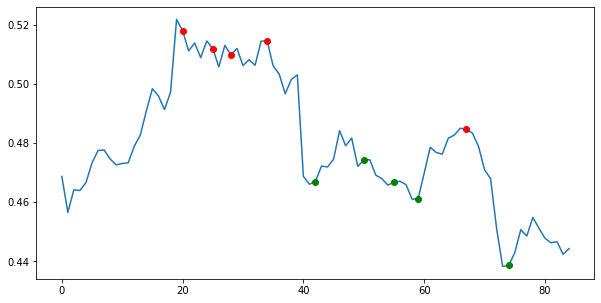

In [ ]:
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()
